In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [2]:
from functions.ellipsoid import Ellipsoid
from functions.rosenbrock import Rosenbrock
from functions.log_ellipsoid import LogEllipsoid
from functions.attractive_sector import AttractiveSector
from functions.sum_of_different_powers import SumOfDifferentPowers

In [3]:
from optimizers.trust_region.trust_region import TrustRegion

In [4]:
def plot_contour(f, xs=10, ys=10, lines=50):
    n = 500
    x, y = np.linspace(-xs, xs, n), np.linspace(-ys, ys, n)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            Z[i][j] = f([X[i][j], Y[i][j]])
    plt.contour(X,Y,Z, lines)

In [5]:
def print_state(xk, F):
    print("-----")
    print("x: ", xk)
    print("f(x): ", F.f(xk))
    print("f_grad(x): ", F.gradient(xk))
    print("f_hess(x):", F.hessian(xk))

def print_meta_state(meta, m, latest_point):
    print("delta for next iter", meta['delta'])
    print("rho", meta['rho'])
    print("p", meta['direction'])
    print("p_norm", np.linalg.norm(meta['direction'][0]))
    print("m", m(meta['direction'][0], latest_point))
def plot_contour_from_function(minimize, F, xs=10, ys=10, g_tol=0.1, debug=False, start_point=[8,8], lambda_init=1, delta_init=100, max_iterations=1000):
    xk_at_i = [start_point]
    if debug:
        print_state(start_point, F)
    def m(p, x):
        return F.f(x) + np.array(F.gradient(x)).T @ p + 0.5 * p.T @ F.hessian(x) @ p
    def c(xk):
        if debug:
            print_state(xk, F)
        xk_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    def meta_f(meta):
        if debug:
            print_meta_state(meta, m, xk_at_i[-1])
    plot_contour(F.f, xs=xs, ys=ys)
    print(minimize(F.f, start_point, F.gradient, hes=F.hessian, callback=c, lambda_init=lambda_init, delta_init=delta_init, meta_callback=meta_f, max_iterations=max_iterations))
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

In [6]:
def plot_delta_from_function(minimize, F, g_tol=0.5, debug=False, start_point=[8,8], delta_init=10, lambda_init=1):
    delta_at_i = []
    p_at_i = []
    rho_at_i = []
    x_at_i = []
    if debug:
        print_state(start_point, F)
    def c(xk):
        if debug:
            print_state(xk, F)
        x_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    def m(meta):
        delta_at_i.append(meta['delta'])
        p_at_i.append(meta['direction'])
        rho_at_i.append(meta['rho'])
    minimize(F.f, start_point, F.gradient, hes=F.hessian, callback=c, meta_callback=m, delta_init=delta_init, lambda_init=lambda_init)
    plt.xlabel('iterations')
    plt.ylabel('trust region radius')
    plt.plot(delta_at_i)
    return delta_at_i, p_at_i, rho_at_i, x_at_i
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    #plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    #plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

[ 3.03832766e-02 -2.64153448e-05]


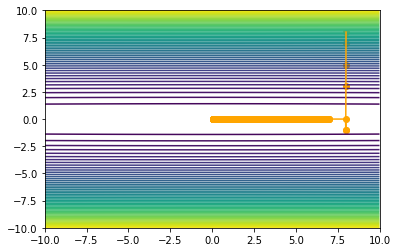

In [12]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e-5)

[3.03553580e-02 2.64234653e-05]


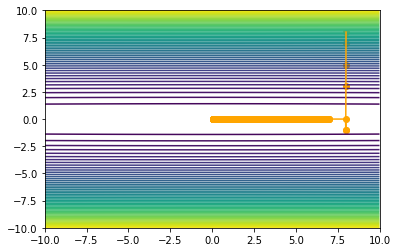

In [13]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e-3)

[3.04054943e-02 2.64088752e-05]


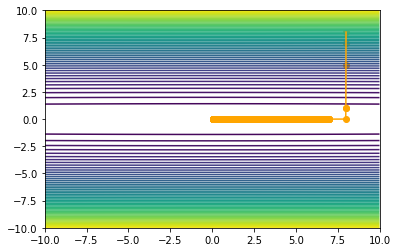

In [13]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e-1)

[ 3.03650313e-02 -2.64206528e-05]


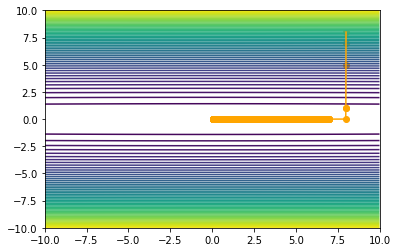

In [7]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e3, delta_init=100)

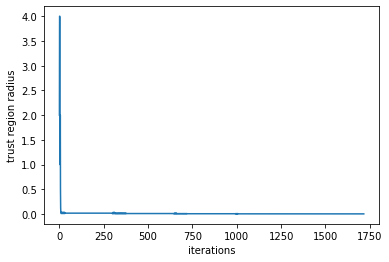

In [7]:
deltas_ellipsoid, ps_ellipsoid, rhos_ellipsoid, xs_ellipsoid = plot_delta_from_function(TrustRegion.minimize, Ellipsoid, delta_init=100)

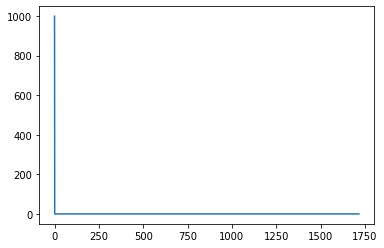

In [8]:
norms_ellipsoid = []
for p in ps_ellipsoid:
    norms_ellipsoid.append(np.linalg.norm(p[0]))
plt.plot((np.append(np.array([1e3]), np.array(deltas_ellipsoid)[:-1]) - np.array(norms_ellipsoid)))

In [12]:
plt.plot(deltas_ellipsoid[0:5])

NameError: name 'deltas_ellipsoid' is not defined

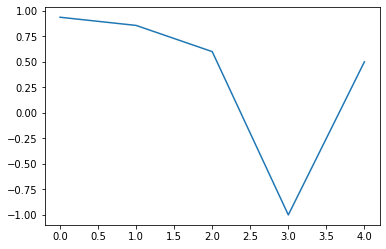

In [10]:
plt.plot(rhos_ellipsoid[0:5])

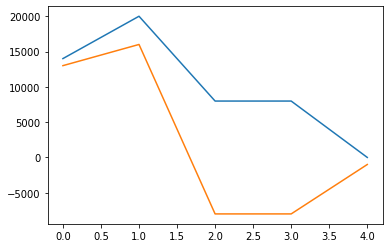

In [11]:
def m(p, x):
    return Ellipsoid.f(x) + np.array(Ellipsoid.gradient(x)).T @ p + 0.5 * p.T @ Ellipsoid.hessian(x) @ p
plt.plot([m(np.zeros(len(x)), x) - m(p, x) for p, x in zip([p[0] for p in ps_ellipsoid], xs_ellipsoid)][0:5])
plt.plot([Ellipsoid.f(x) - Ellipsoid.f(x + p) for p, x in zip([p[0] for p in ps_ellipsoid], xs_ellipsoid)][0:5])
#plt.plot(rhos_ellipsoid[0:5])
#plt.plot(deltas_ellipsoid[0:5])

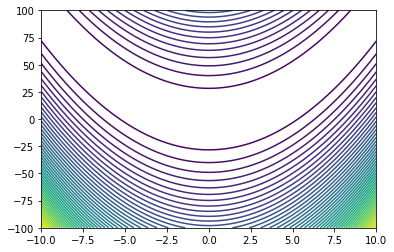

In [19]:
plot_contour(Rosenbrock.f, xs=10, ys=100)

-----
x:  [8, 8]
f(x):  313649
f_grad(x):  [179214 -11200]
f_hess(x): [[73602 -3200]
 [-3200   200]]
delta for next iter 2
rho 1.021617947260826
p (array([-0.99659519,  0.0824502 ]), 105963.74001293204)
p_norm 1.0
m 170936.1957268939
-----
x:  [7.00340481 8.0824502 ]
f(x):  167851.0378506733
f_grad(x):  [114770.43901314  -8193.04575799]
f_hess(x): [[55626.23470552 -2801.36192555]
 [-2801.36192555   200.        ]]
delta for next iter 4
rho 1.133882199327499
p (array([-1.80419974,  0.86305464]), 7400.658219623339)
p_norm 2.0
m 48683.24589219903
-----
x:  [5.19920508 8.94550484]
f(x):  32728.799815796643
f_grad(x):  [37622.00303337 -3617.24571974]
f_hess(x): [[28861.8781874  -2079.68203088]
 [-2079.68203088   200.        ]]
delta for next iter 8
rho 1.172356180437106
p (array([-1.21814411,  3.81000327]), 783.5325334669667)
p_norm 4.0
m 5635.464676392272
-----
x:  [ 3.98106097 12.75550811]
f(x):  965.7609164621056
f_grad(x):  [4931.86948807 -618.66766263]
f_hess(x): [[13918.41246164 -1592.

AssertionError: The norm of p is larger than delta

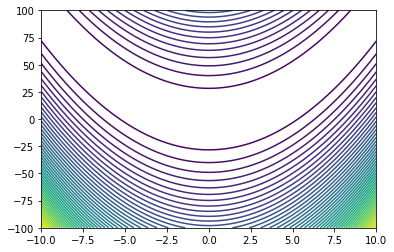

In [7]:
plot_contour_from_function(TrustRegion.minimize, Rosenbrock, xs=10, ys=100, debug=True, max_iterations=17, lambda_init=1e20)

LinAlgError: Matrix is not positive definite

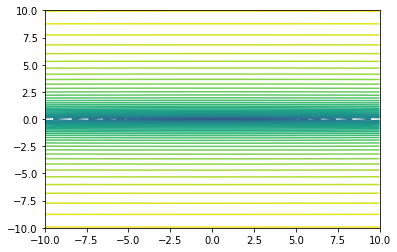

In [8]:
plot_contour_from_function(TrustRegion.minimize, LogEllipsoid)

/home/rasmuslovstad/Programs/assignments/num-opt/optimizers/trust_region/__init__.py:21: RuntimeWarning: invalid value encountered in double_scalars
  return (f(x) - f(x+p))/(m(np.zeros(len(x)), x) - m(p, x))


KeyboardInterrupt: 

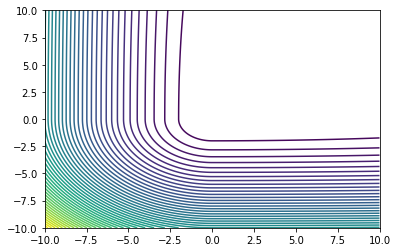

In [11]:
plot_contour_from_function(TrustRegion.minimize, AttractiveSector)

[2.99093859e-06 1.52467084e-03]


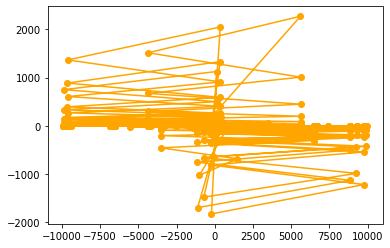

In [10]:
plot_contour_from_function(TrustRegion.minimize, SumOfDifferentPowers, debug=False)

In [ ]:
bb = np.array([[-7278.9319585, -1191.09660256],
 [-1191.09660256, 200.        ]])
np.linalg.eigvals(bb)
np.linalg.eigvals(bb + np.diag([7464.044546002779+0.0001, 7464.044546002779+0.0001]))

In [12]:
g = np.array([-103190.49621188, 9893.02657183])
B = np.array([[ 1979.10981335,-2086.29638149],
 [-2086.29638149,200.        ]])
lam = 0
delta = 64.0
smallest_eigenval = np.min(np.linalg.eigvals(B))
for l in range(100):
    while lam <= - smallest_eigenval:
        print("i")
        lam = lam - (lam + smallest_eigenval - 0.0001)
    R = np.linalg.cholesky(B + np.diag(np.array([lam for _ in g])))
    p = np.linalg.solve(R.T @ R, -g)
    q = np.linalg.solve(R.T, p)
    lam = lam + (np.linalg.norm(p)/np.linalg.norm(q))**2 * \
        ((np.linalg.norm(p) - delta) / delta)
    #print(p)
p
#p = np.linalg.solve(R.T, -g)

i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i


array([23.83412945, 13.18966287])

In [9]:
np.linalg.norm(np.array([-1/np.sqrt(2), -1/np.sqrt(2)]))

0.9999999999999999

In [10]:
1+4*(-99/100)

-2.96